In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
'''
a. Get the data
'''
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_jungyu = {'images': train_images, 'labels': train_labels}
test_jungyu = {'images': test_images, 'labels': test_labels}

In [4]:
'''
b. Initial Exploration
'''
# Size
print(len(train_jungyu['images']))
print(len(test_jungyu['images']))

# Resolution (Dimension)
print(train_jungyu['images'][0].shape)

# Largest Pixel Value
print(np.amax(train_jungyu['images']))

60000
10000
(28, 28)
255


In [5]:
'''
c. Data Pre-processing
'''
# Normalize
train_jungyu['images'] = train_jungyu['images'] / 255.0
test_jungyu['images'] = test_jungyu['images'] / 255.0

In [6]:
# One-hot encode
print(np.unique(train_jungyu['labels']))
train_jungyu['labels'] = tf.keras.utils.to_categorical(train_jungyu['labels'], num_classes=10)
test_jungyu['labels'] = tf.keras.utils.to_categorical(test_jungyu['labels'], num_classes=10)

[0 1 2 3 4 5 6 7 8 9]


In [7]:
# Display the shape
print(train_jungyu['labels'].shape)
print(test_jungyu['labels'].shape)

(60000, 10)
(10000, 10)


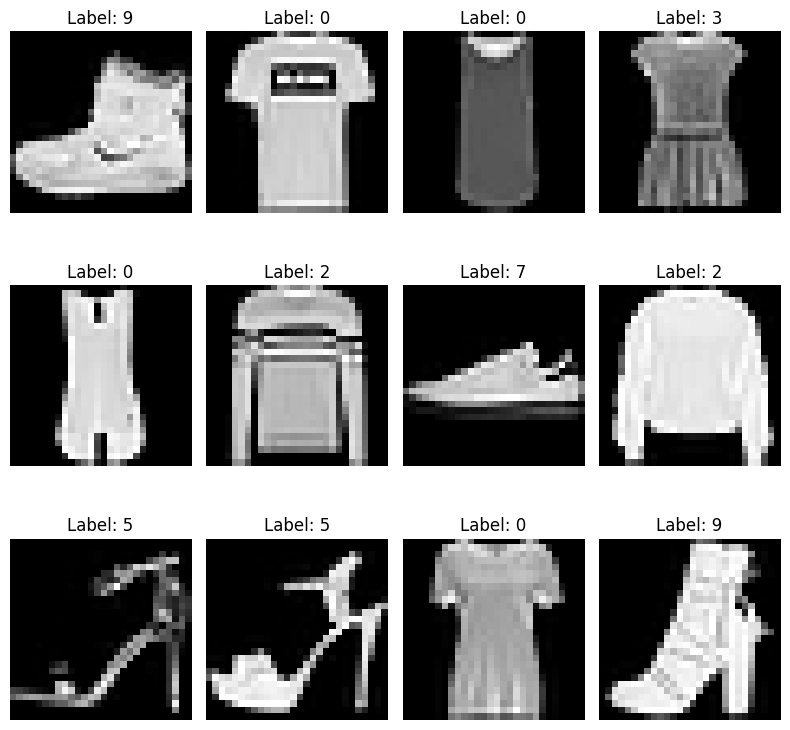

In [ ]:
'''
d. Visualization
'''
def plot_image(image, label):
  plt.imshow(image, cmap='gray')
  plt.title(f'Label: {label}')
  plt.axis('off')

def plot_first_12_images(train_data):
  plt.figure(figsize=(8, 8))

  for i in range(12):
    plt.subplot(3, 4, i+1)
    plot_image(train_data['images'][i], train_data['labels'][i].argmax())

  plt.tight_layout()
  plt.show()

plot_first_12_images(train_jungyu)

In [8]:
'''
e. Training Data Preparation
'''
random_seed = 21

x_train_jungyu, x_val_jungyu, y_train_jungyu, y_val_jungyu = train_test_split(
    train_jungyu['images'],
    train_jungyu['labels'],
    test_size=0.2,
    random_state=random_seed
)

In [25]:
'''
f. Build, Train, and Validate CNN Model
'''
cnn_model_jungyu = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model_jungyu.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cnn_model_jungyu.summary()

cnn_history_jungyu = cnn_model_jungyu.fit(
    x_train_jungyu, y_train_jungyu,
    epochs=8,
    batch_size=256,
    validation_data=(x_val_jungyu, y_val_jungyu)
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          80,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 90,678 (354.21 KB)

 Trainable params: 90,678 (354.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 36s 174ms/step - accuracy: 0.6335 - loss: 1.1098 - val_accuracy: 0.8185 - val_loss: 0.4996
Epoch 2/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 42s 180ms/step - accuracy: 0.8341 - loss: 0.4596 - val_accuracy: 0.8472 - val_loss: 0.4183
Epoch 3/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 173ms/step - accuracy: 0.8599 - loss: 0.4023 - val_accuracy: 0.8630 - val_loss: 0.3797
Epoch 4/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 33s 178ms/step - accuracy: 0.8737 - loss: 0.3534 - val_accuracy: 0.8737 - val_loss: 0.3525
Epoch 5/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 42s 183ms/step - accuracy: 0.8819 - loss: 0.3307 - val_accuracy: 0.8806 - val_loss: 0.3254
Epoch 6/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 39s 174ms/step - accuracy: 0.8873 - loss: 0.3184 - val_accuracy: 0.8837 - val_loss: 0.3184
Epoch 7/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 177ms/step - accuracy: 0.8893 - loss: 0.3004 - val_accuracy: 0.8863 - val_loss: 0.3062
Epoch 8/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 35s 187ms/step - accuracy: 0.8967 - loss: 0.2850 - 

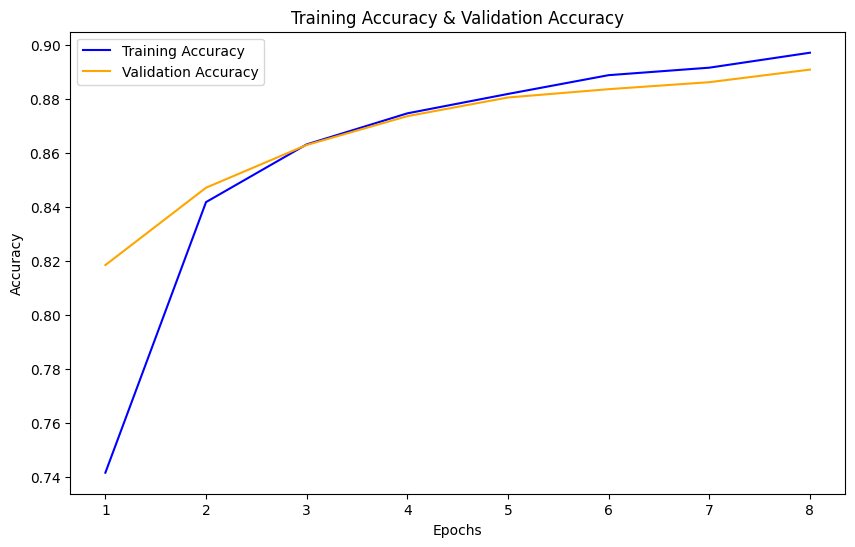

In [26]:
'''
g. Test and analyze the model
'''
def plot_accuracy(cnn_history):
  epochs_range = range(1, len(cnn_history.history['accuracy']) + 1)
  plt.figure(figsize=(10, 6))
  plt.plot(epochs_range, cnn_history.history['accuracy'], label='Training Accuracy', color='blue')
  plt.plot(epochs_range, cnn_history.history['val_accuracy'], label='Validation Accuracy', color='orange')
  plt.title('Training Accuracy & Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='best')
  plt.show()

plot_accuracy(cnn_history_jungyu)

In [27]:
test_loss, test_accuracy = cnn_model_jungyu.evaluate(test_jungyu['images'], test_jungyu['labels'])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8871 - loss: 0.3281


In [28]:
cnn_predictions_jungyu = cnn_model_jungyu.predict(test_jungyu['images'])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [29]:
class_names_with_labels = [f'{name} ({i})' for i, name in enumerate(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                                                                     'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])]

def plot_prediction_distribution(true_label, predictions, class_names):
    bar_positions = np.arange(len(predictions))

    # Set all bars to gray initially
    bar_colors = ['gray'] * 10

    highest_prediction_index = predictions.argmax()
    bar_colors[highest_prediction_index] = 'blue'

    bar_colors[true_label] = 'green'


    plt.bar(bar_positions, predictions, color=bar_colors)

    plt.xticks(bar_positions, class_names, rotation=45)
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.title('Prediction Distribution')

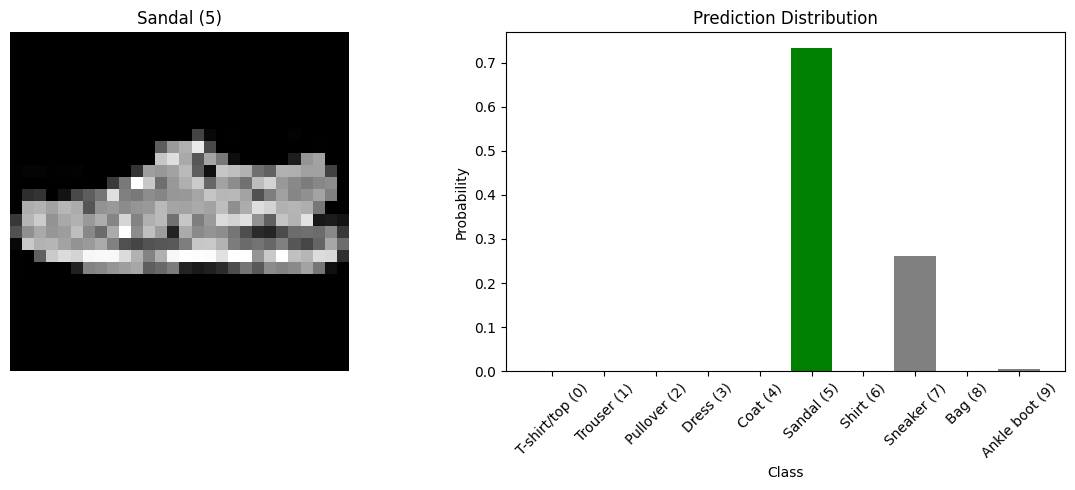

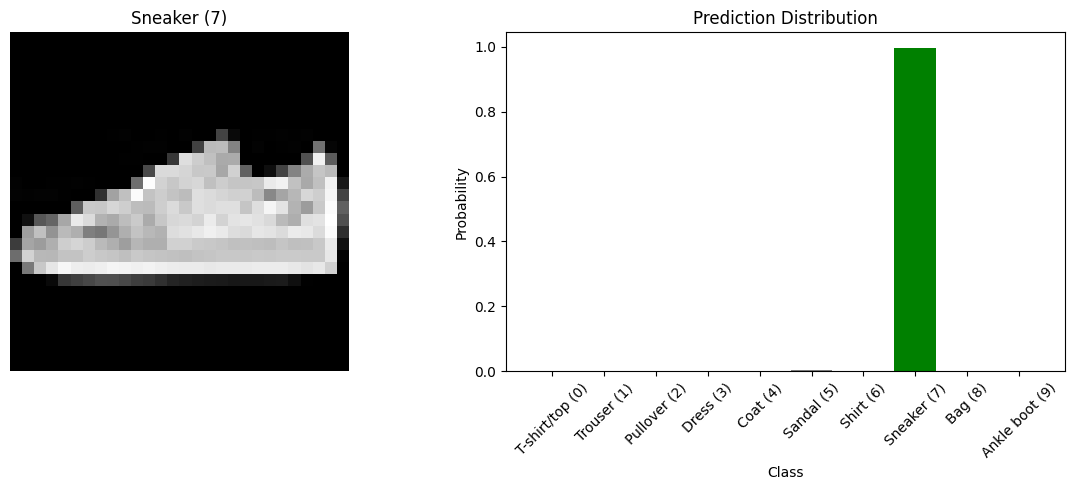

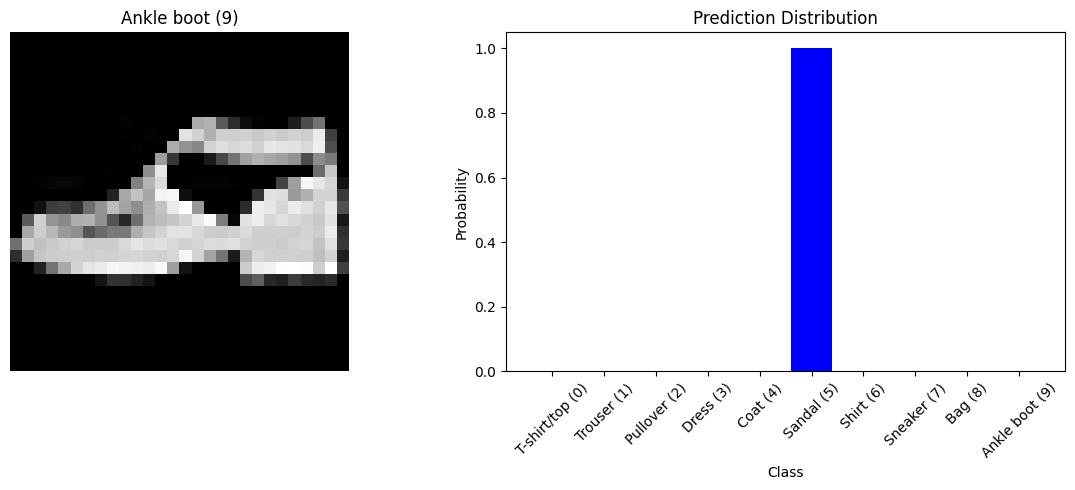

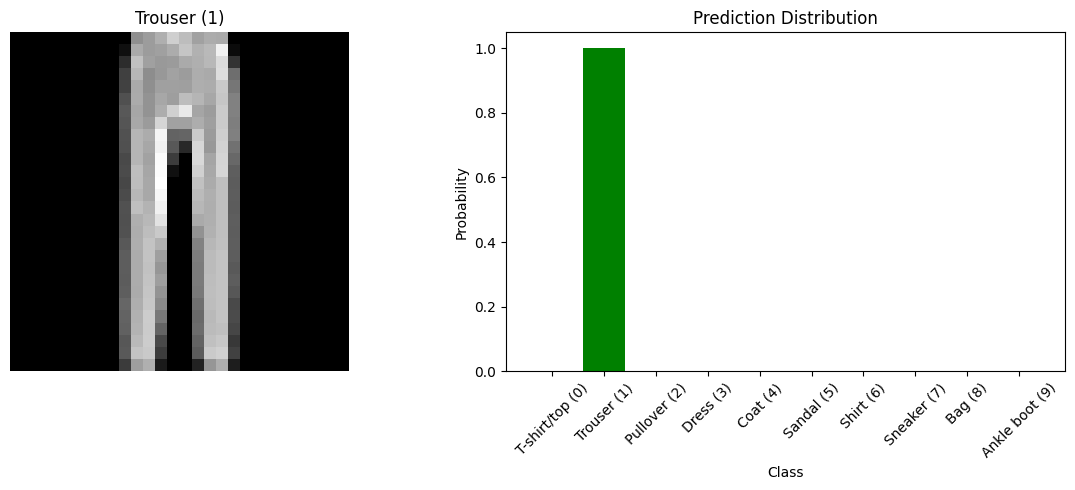

In [30]:
start_index = 21
end_index = start_index + 4

for i in range(start_index, end_index):
    plt.figure(figsize=(12, 5))

    # Plot the image
    plt.subplot(1, 2, 1)
    plt.imshow(test_jungyu['images'][i].reshape(28, 28), cmap='gray')
    plt.title(class_names_with_labels[test_jungyu['labels'][i].argmax()])
    plt.axis('off')

    # Plot the prediction distribution
    plt.subplot(1, 2, 2)
    plot_prediction_distribution(test_jungyu['labels'][i].argmax(), cnn_predictions_jungyu[i], class_names_with_labels)

    plt.tight_layout()
    plt.show()

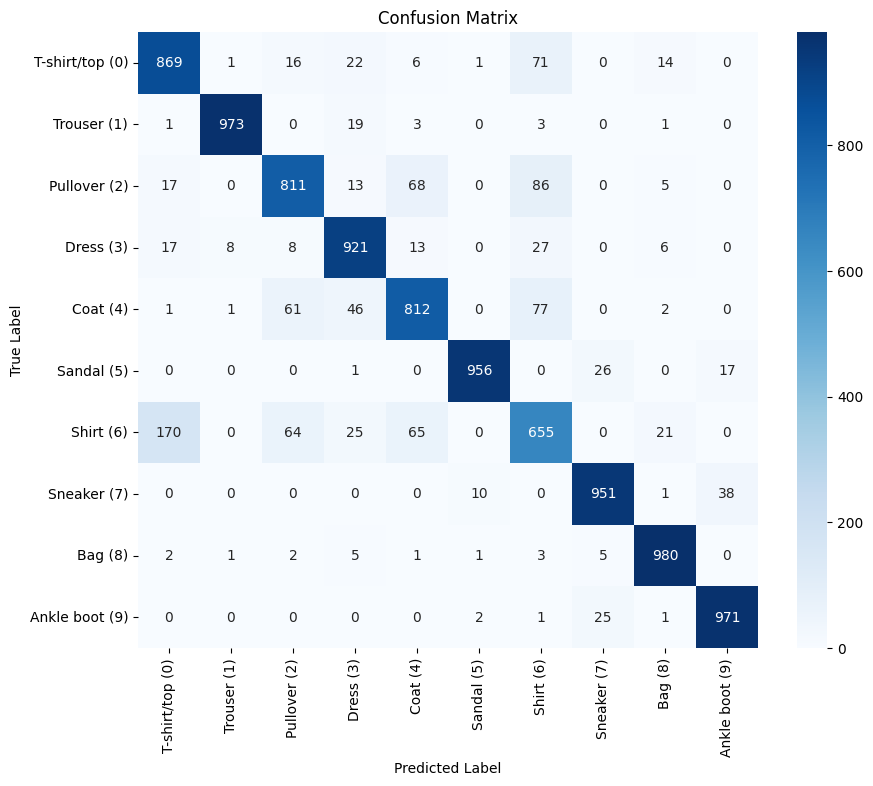

In [ ]:
def plot_confusion_matrix(true_labels, predictions, class_names):
    y_true = true_labels.argmax(axis=1)
    y_pred = predictions.argmax(axis=1)

    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(test_jungyu['labels'], cnn_predictions_jungyu, class_names_with_labels)

In [9]:
'''
h. Build, Train, Validate, Test and Analyze RNN Model
'''
rnn_model_jungyu = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.LSTM(128, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [10]:
rnn_model_jungyu.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
rnn_model_jungyu.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          80,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,674 (319.04 KB)

 Trainable params: 81,674 (319.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
rnn_history_jungyu = rnn_model_jungyu.fit(
    x_train_jungyu, y_train_jungyu,
    epochs=8,
    batch_size=256,
    validation_data=(x_val_jungyu, y_val_jungyu)
)

Epoch 1/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 33s 153ms/step - accuracy: 0.5980 - loss: 1.1621 - val_accuracy: 0.7824 - val_loss: 0.5880
Epoch 2/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 27s 144ms/step - accuracy: 0.8080 - loss: 0.5149 - val_accuracy: 0.8197 - val_loss: 0.4738
Epoch 3/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 139ms/step - accuracy: 0.8341 - loss: 0.4504 - val_accuracy: 0.8443 - val_loss: 0.4256
Epoch 4/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 142ms/step - accuracy: 0.8487 - loss: 0.4102 - val_accuracy: 0.8505 - val_loss: 0.4045
Epoch 5/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 143ms/step - accuracy: 0.8530 - loss: 0.3954 - val_accuracy: 0.8570 - val_loss: 0.3924
Epoch 6/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 26s 139ms/step - accuracy: 0.8631 - loss: 0.3771 - val_accuracy: 0.8622 - val_loss: 0.3675
Epoch 7/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 141ms/step - accuracy: 0.8650 - loss: 0.3629 - val_accuracy: 0.8589 - val_loss: 0.3758
Epoch 8/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 142ms/step - accuracy: 0.8699 - loss: 0.3455 - 

In [13]:
test_loss_rnn, test_accuracy_rnn = rnn_model_jungyu.evaluate(test_jungyu['images'], test_jungyu['labels'])

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8692 - loss: 0.3634


In [14]:
rnn_predictions_jungyu = rnn_model_jungyu.predict(test_jungyu['images'])

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


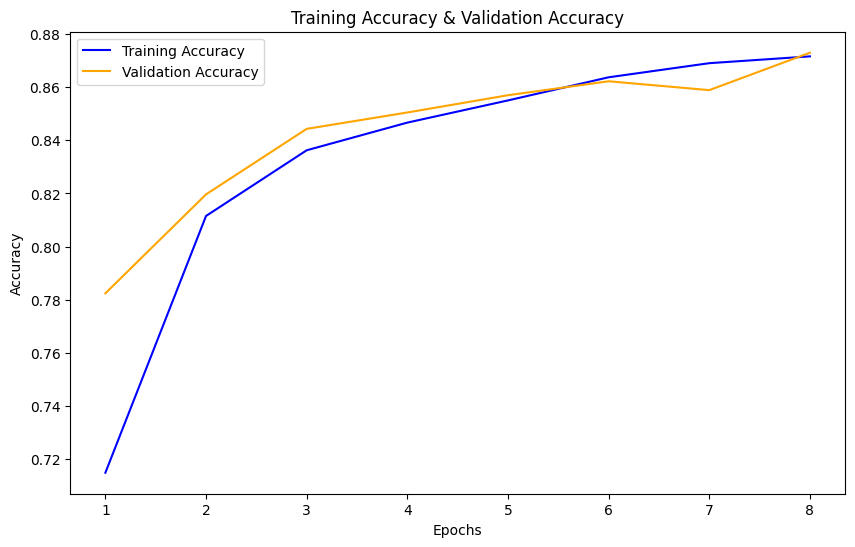

In [17]:
plot_accuracy(rnn_history_jungyu)

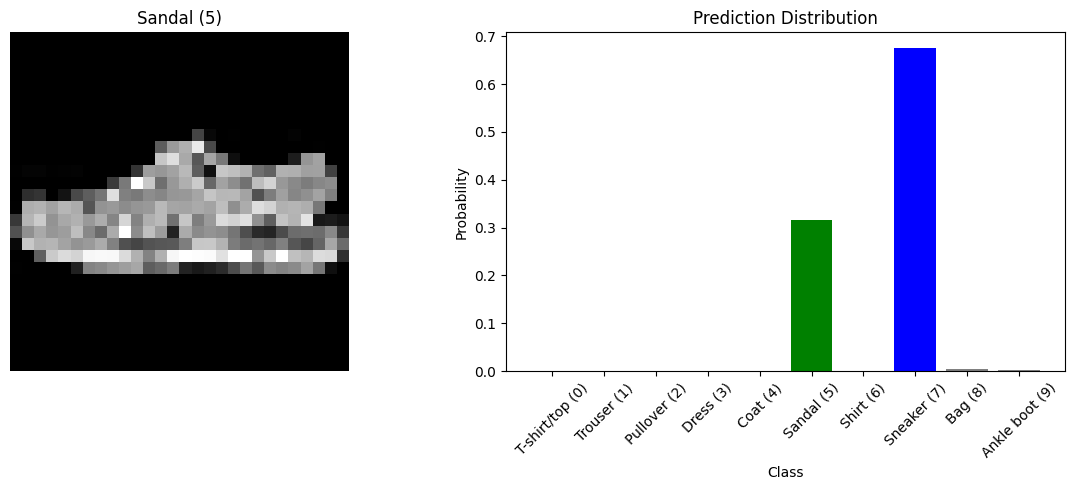

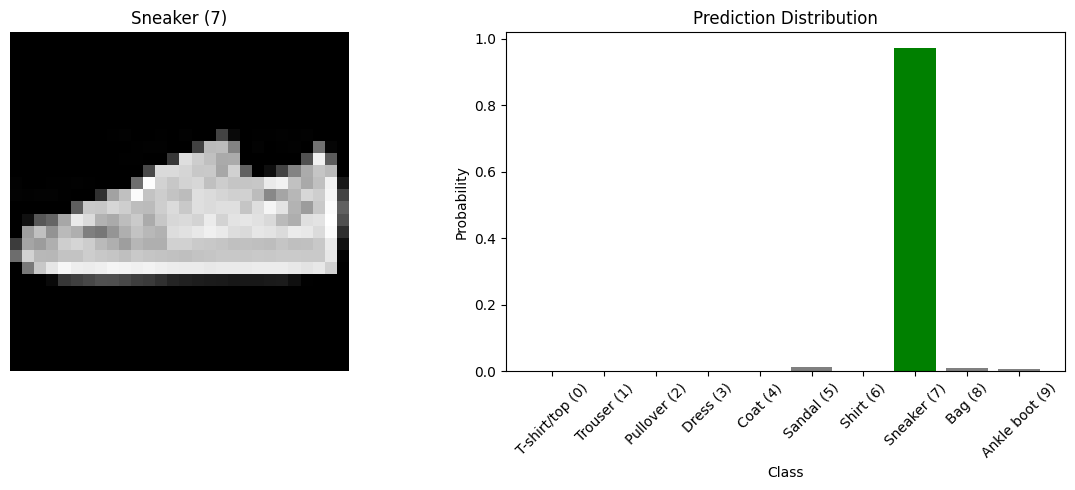

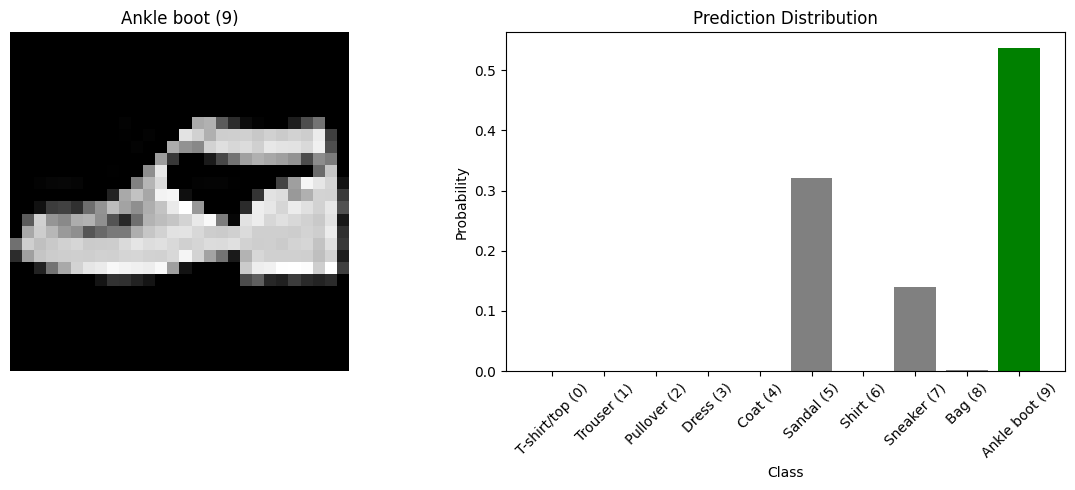

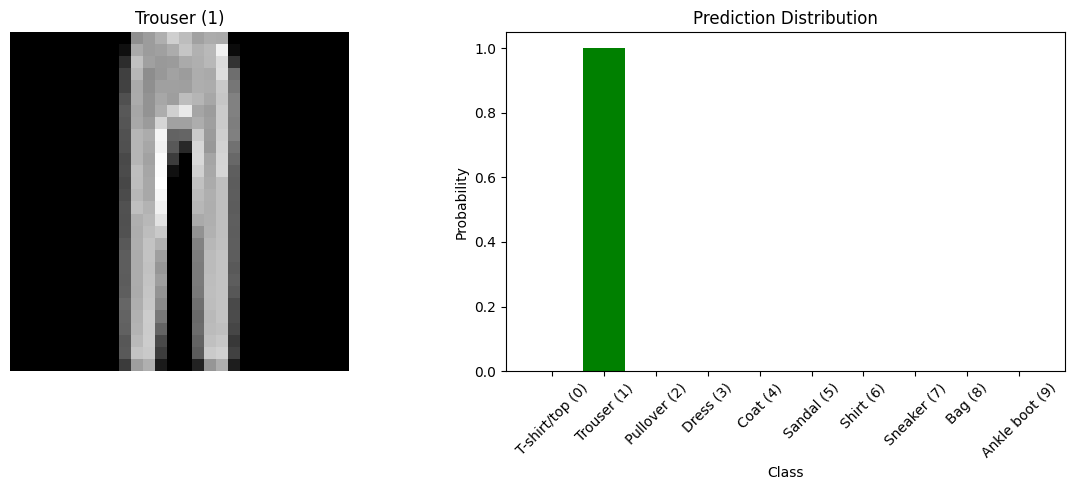

In [24]:
for i in range(start_index, end_index):
    plt.figure(figsize=(12, 5))

    # Plot the image
    plt.subplot(1, 2, 1)
    plt.imshow(test_jungyu['images'][i].reshape(28, 28), cmap='gray')
    plt.title(class_names_with_labels[test_jungyu['labels'][i].argmax()])
    plt.axis('off')

    # Plot the prediction distribution
    plt.subplot(1, 2, 2)
    plot_prediction_distribution(test_jungyu['labels'][i].argmax(), rnn_predictions_jungyu[i], class_names_with_labels)

    plt.tight_layout()
    plt.show()

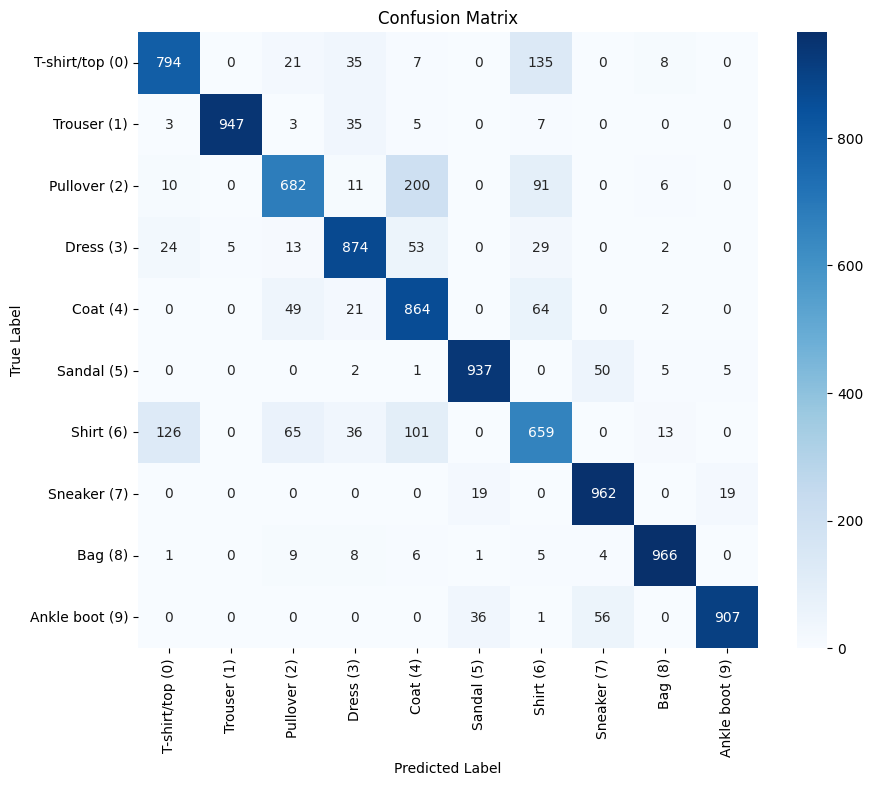

In [ ]:
plot_confusion_matrix(test_jungyu['labels'], rnn_predictions_jungyu, class_names_with_labels)